In [1]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

#特征数
n_features=1000
x,y=datasets.make_classification(n_samples=4000,n_features=n_features,n_classes=2,random_state=0)

#转换成one hot编码
y=to_categorical(y)
#标准化到0-1之间
x=MinMaxScaler().fit_transform(x) 

#分类模型是一个非常简单的多层感知机，输入层大小为1000，输出层为2，激活函数为softmax
model = Sequential()
model.add(Dense(2,activation='softmax',
input_shape=(n_features,) ) )
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 2002      
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
_________________________________________________________________


In [2]:
model.fit(x,y,epochs=30,batch_size=16)

Epoch 1/30
4000/4000 [==============================] - 0s 108us/step - loss: 0.7373 - acc: 0.5085
Epoch 2/30
4000/4000 [==============================] - 0s 74us/step - loss: 0.6988 - acc: 0.5608
Epoch 3/30
4000/4000 [==============================] - 0s 71us/step - loss: 0.6684 - acc: 0.5995
Epoch 4/30
4000/4000 [==============================] - 0s 74us/step - loss: 0.6468 - acc: 0.6173
Epoch 5/30
4000/4000 [==============================] - 0s 71us/step - loss: 0.6184 - acc: 0.6558
Epoch 6/30
4000/4000 [==============================] - 0s 70us/step - loss: 0.6106 - acc: 0.6573
Epoch 7/30
4000/4000 [==============================] - 0s 71us/step - loss: 0.5781 - acc: 0.6993
Epoch 8/30
4000/4000 [==============================] - 0s 71us/step - loss: 0.5696 - acc: 0.7047
Epoch 9/30
4000/4000 [==============================] - 0s 71us/step - loss: 0.5539 - acc: 0.7235
Epoch 10/30
4000/4000 [==============================] - 0s 73us/step - loss: 0.5349 - acc: 0.7428
Epoch 11/30
4000/4

[[0.6266942  0.37330577]]


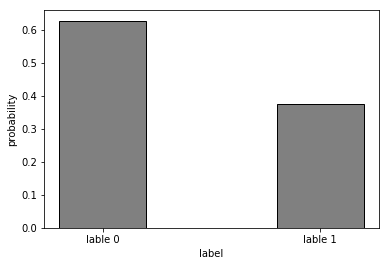

In [3]:
#获取第0号元素
x0=x[0]
y0=y[0]
x0 = np.expand_dims(x0, axis=0)
y0_predict = model.predict(x0)
print(y0_predict)

index=[0,1]
labels=["lable 0","lable 1"]
probability=y0_predict[0]

fig = plt.figure()
plt.bar(index,probability,0.4,color="gray",edgecolor='black')
plt.xlabel("label")
plt.ylabel("probability")
plt.xticks(index, labels)

plt.show()  

[[0.36320868 0.6367913 ]]


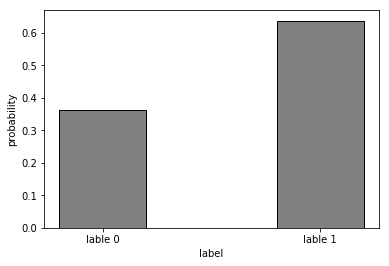

In [4]:
#目标是伪装成标签1
object_type_to_fake=1
model_output_layer=model.output
model_input_layer=model.input
cost_function=model_output_layer[0, object_type_to_fake]
gradient_function = K.gradients(cost_function, model_input_layer)[0]
grab_cost_and_gradients_from_model=K.function([model_input_layer,K.learning_phase()], [cost_function, gradient_function] )

e = 0.01
cost, gradients = grab_cost_and_gradients_from_model([x0, 0])
n = np.sign(gradients)
x0 += n * e
#print(x0)
y0_predict = model.predict(x0)
print(y0_predict)

index=[0,1]
labels=["lable 0","lable 1"]
probability=y0_predict[0]

fig = plt.figure()
plt.bar(index,probability,0.4,color="gray",edgecolor='black')
plt.xlabel("label")
plt.ylabel("probability")
plt.xticks(index, labels)

plt.show() 